# building a model that predicts whether a passenger on the Titanic survived or not.

### load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = pd.read_csv("/kaggle/input/test-file/tested.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

### Get data information 

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


###  Get sample

In [4]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
198,1090,0,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.500,NaN,S
274,1166,0,3,"Saade, Mr. Jean Nassr",male,NaN,0,0,2676,7.225,NaN,C
105,997,0,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.525,NaN,S
187,1079,0,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.050,NaN,S
155,1047,0,3,"Duquemin, Mr. Joseph",male,24.0,0,0,S.O./P.P. 752,7.550,NaN,S


# So we will predict depend on  pclass , sex , age , fare

### Drop nan values

In [5]:
titanic= titanic.dropna(subset=['Fare', 'Age'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


### Data visulization

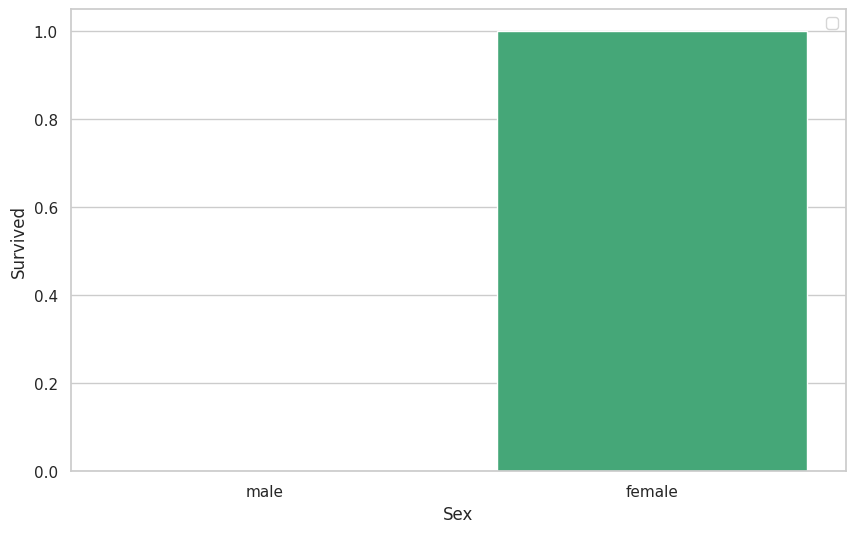

In [6]:
plt.figure(figsize=(10, 6))

sns.barplot(x=titanic["Sex"] , y=titanic["Survived"]  ,palette="viridis")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.legend()

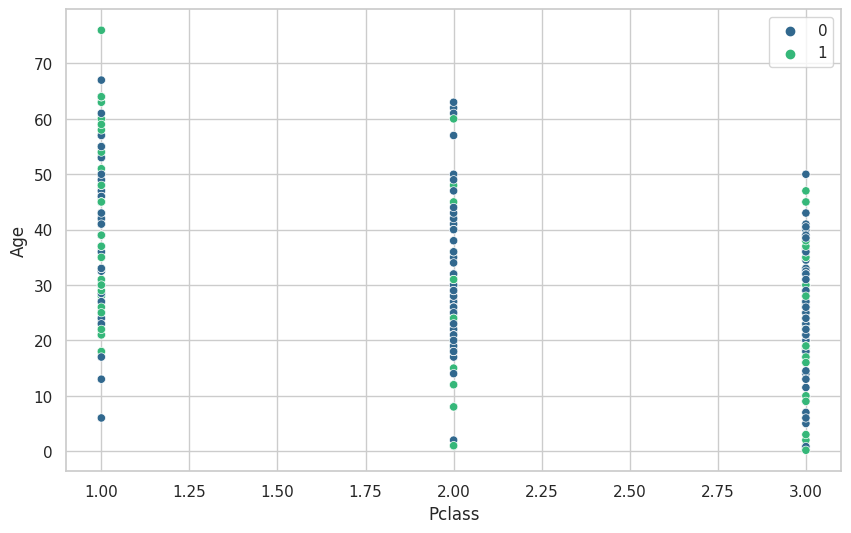

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y=titanic["Age"] , x=titanic["Pclass"] ,hue=titanic["Survived"] ,palette="viridis")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.legend()

# Data preprocessing

In [ ]:
x=titanic[["Pclass" , "Sex" , "Age" , "Fare"]]
y=titanic["Survived"]


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x["Sex"] = encoder.fit_transform(x["Sex"])
x

In [ ]:
y

### train_test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# Data modeling

### DecisionTreeClassifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train , y_train)


In [ ]:
clf.predict([[3 , 0 , 40 , 7]])

In [ ]:
clf.score(x_test , y_test)

In [ ]:
y_pred=clf.predict(x_test)


### confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()